# Exploring population features

This notebook showcases statistics gathered during genetic algorithm runtime.

The goal is to select input features that are sufficiently diverse and informative to be useful to a Deep Reinforcement Learning agent

In [2]:
from deep_rl_ga.ga_env import GeneticAlgorithmEnv
import numpy as np
import pandas as pd
import random

import torch
from deap import base
from deap import creator
from deap import benchmarks
from deap import tools
from deap import algorithms

from deep_rl_ga.diversity import (
    fitness_max_mean_ratio_diversity,
    fitness_mean_min_ratio_diversity,
    number_of_clusters_diversity,
    gene_mean_std_diversity,
    gene_mean_unique_ratio_diversity,
    clusters_of,
)

IND_SIZE = 2
LOW_BOUND = -5.12
UP_BOUND = 5.12
FITNESS_FUNCTION = benchmarks.rastrigin

MATING_RATE = 0.3
INDIVIDUAL_MUTATION_RATE = 0.3
TOURNAMENT_SIZE = 3
INITIAL_POPULATION_SIZE = 150
MAX_EVALS = 10_000

RANDOM_SEED = 0

random.seed(
    RANDOM_SEED
    )
np.random.seed(
    RANDOM_SEED
    )

ACTIONS_SEL = [
    {'function': tools.selTournament, 'tournsize': TOURNAMENT_SIZE},
]

ACTIONS_CX = [
    {'function': tools.cxBlend, 'alpha': UP_BOUND},
]

ACTIONS_MU = [
    {'function': tools.mutGaussian, 'mu': 0, 'sigma': 1, 'indpb': INDIVIDUAL_MUTATION_RATE},
]

STAT_FUNCTIONS = [
    ("max_fitness", lambda
        pop: np.max(
        [ind.fitness.values[0] for ind in pop]
        )),
    ("min_fitness", lambda
        pop: np.min(
        [ind.fitness.values[0] for ind in pop]
        )),
    ("fitness_std_range_diversity", lambda
        pop: np.std(
        [ind.fitness.values[0] for ind in pop]
        )),
    ("number_of_clusters_diversity", number_of_clusters_diversity),
    ("clusters_of_fitness_max_mean_ratio_diversity", clusters_of(
        fitness_max_mean_ratio_diversity
    )),
    ("clusters_of_fitness_mean_min_ratio_diversity", clusters_of(
        fitness_mean_min_ratio_diversity
    )),
    ("clusters_of_gene_mean_std_diversity", clusters_of(
        gene_mean_std_diversity
    )),
    ("clusters_of_gene_mean_unique_ratio_diversity", clusters_of(
        gene_mean_unique_ratio_diversity
    )),
]


curr_device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
em = GeneticAlgorithmEnv(
    num_dims=IND_SIZE,
    low_bound=LOW_BOUND,
    up_bound=UP_BOUND,
    fitness_fn=benchmarks.rastrigin,
    max_evals=MAX_EVALS,
    initial_population_size=INITIAL_POPULATION_SIZE,
    actions_sel=ACTIONS_SEL,
    actions_cx=ACTIONS_CX,
    actions_mu=ACTIONS_MU,
    stat_functions=STAT_FUNCTIONS,
    device=curr_device,
)

In [3]:
while not em.done:
    em.step(random.randrange(em.num_actions_available()))
print(f'Best fitness: {em.get_reward()}')

/home/pbilko/miniconda3/envs/PP/lib/python3.9/site-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/home/pbilko/miniconda3/envs/PP/lib/python3.9/site-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/home/pbilko/miniconda3/envs/PP/lib/python3.9/site-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/home/pbilko/miniconda3/envs/PP/lib/python3.9/site-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/home/pbilko/miniconda3/envs/PP/lib/python3.9/site-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability

Best fitness: 566201.9114516581


/home/pbilko/miniconda3/envs/PP/lib/python3.9/site-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [4]:
df = pd.DataFrame(em.logbook)
df.head()

,gen,evals,max_fitness,min_fitness,fitness_std_range_diversity,number_of_clusters_diversity,clusters_of_fitness_max_mean_ratio_diversity,clusters_of_fitness_mean_min_ratio_diversity,clusters_of_gene_mean_std_diversity,clusters_of_gene_mean_unique_ratio_diversity
0,0,150,80.029160,3.617296,14.302866,14,"([1.8647626636524715, 1.950315849864532, 1.723...","([7.829515205023808, 2.175718511654591, 8.8980...","([1.398453026366174, 1.5112297984151368, 1.389...","([1.0, 1.0, 1.0, 1.0], [[-2.0284721074452614, ..."
1,1,150,1535.331025,2.980608,209.879715,11,"([7.582347935823392, 3.5345066692964475, 2.595...","([11.412922671090149, 3.1672375175797813, 4.82...","([3.189451724054626, 5.694688060297724, 6.0233...","([0.7936507936507936, 1.0, 1.0, 1.0], [[0.0308..."
2,2,150,1118.770637,2.980608,184.661020,11,"([1.7436941697818666, 4.234826412671295, 1.761...","([10.037114077329534, 3.9373560649694674, 3.33...","([2.8335447311847064, 8.364178572977544, 8.882...","([0.6732283464566929, 1.0, 1.0, 1.0], [[0.4152..."
3,3,150,438.179321,2.980608,70.125484,11,"([11.24566822599365, 2.15007429015259, 1.54496...","([2.0237405439272047, 6.733964067590502, 4.673...","([1.870686663781762, 4.00929619893419, 3.96897...","([0.505, 1.0, 1.0, 0.6805555555555556], [[0.01..."
4,4,150,174.507753,2.915272,33.062018,8,"([1.8803088580370797, 7.042697818795625, 4.718...","([5.027662003506393, 3.3655131535663307, 2.337...","([1.400726572184777, 2.122630578840119, 2.9385...","([0.3794642857142857, 1.0, 0.5800000000000001,..."


Clusterized features need to be extracted

In [5]:
clusterized_features = df[[col for col in df.columns if "clusters_of" in col]]
clusterized_features.head()

,clusters_of_fitness_max_mean_ratio_diversity,clusters_of_fitness_mean_min_ratio_diversity,clusters_of_gene_mean_std_diversity,clusters_of_gene_mean_unique_ratio_diversity
0,"([1.8647626636524715, 1.950315849864532, 1.723...","([7.829515205023808, 2.175718511654591, 8.8980...","([1.398453026366174, 1.5112297984151368, 1.389...","([1.0, 1.0, 1.0, 1.0], [[-2.0284721074452614, ..."
1,"([7.582347935823392, 3.5345066692964475, 2.595...","([11.412922671090149, 3.1672375175797813, 4.82...","([3.189451724054626, 5.694688060297724, 6.0233...","([0.7936507936507936, 1.0, 1.0, 1.0], [[0.0308..."
2,"([1.7436941697818666, 4.234826412671295, 1.761...","([10.037114077329534, 3.9373560649694674, 3.33...","([2.8335447311847064, 8.364178572977544, 8.882...","([0.6732283464566929, 1.0, 1.0, 1.0], [[0.4152..."
3,"([11.24566822599365, 2.15007429015259, 1.54496...","([2.0237405439272047, 6.733964067590502, 4.673...","([1.870686663781762, 4.00929619893419, 3.96897...","([0.505, 1.0, 1.0, 0.6805555555555556], [[0.01..."
4,"([1.8803088580370797, 7.042697818795625, 4.718...","([5.027662003506393, 3.3655131535663307, 2.337...","([1.400726572184777, 2.122630578840119, 2.9385...","([0.3794642857142857, 1.0, 0.5800000000000001,..."


In [6]:
feat: pd.Series = clusterized_features.iloc[:, 0]
centroids = feat.apply(lambda record: record[1])
lines = np.stack(centroids.to_numpy())
lines.shape

(67, 4, 2)

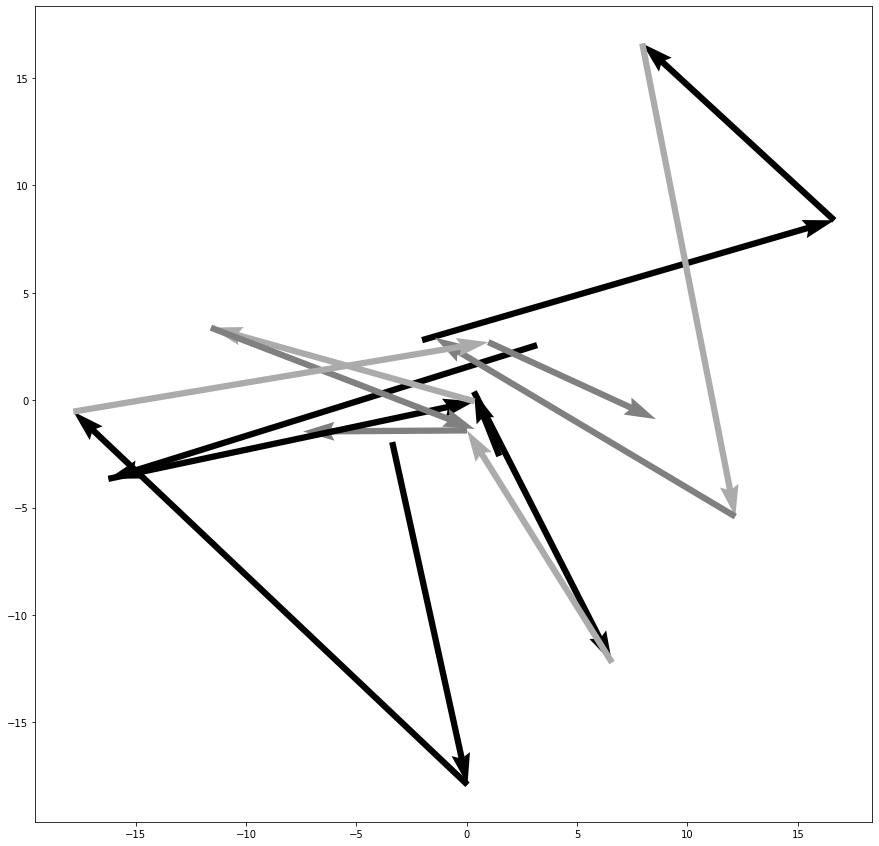

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
lines = lines[:5, :, :]
for i in range(lines.shape[1]):
    plt.quiver(lines[:-1, i, 0], lines[:-1, i, 1], lines[1:, i, 0] - lines[:-1, i, 0], lines[1:, i, 1] - lines[:-1, i, 1], angles='xy', scale_units='xy', scale=1, color=[(255/(j+1), 255/(j+1), 255/(j+1)) for j in range(lines.shape[0])])

# How to sort a list of N-dimensional points?

1. Choose a centroid
2. Choose a point, rotate clockwise around the centroid, marking the points
3. For points on a single angle choose the one closest to the centroid first

## How to match cluster labels from one generation to another, so that corresponding labels from generation 1 are close to those in generation 2 (e.x. generation 1 cluster labeled 3 is close to generation 2 cluster labeled 3)?

Given that the number of clusters is relatively small, we can calculate distances for each possible pairing of cluster from gen1 to cluster from gen2, then keep selecting the smallest distance until all pairs are selected.

In [41]:
centroid_array = np.stack(centroids.to_numpy())
centroid_array.shape

(67, 4, 2)